In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 파일읽기

In [2]:
df=pd.read_excel('./modeling_data/2Weeks_data.xlsx')

# 데이터를 필요한 부분으로 X, Y 나눠 읽어오기

In [3]:
X=df.iloc[:,2:8]
y_origin=df['Label']
# y=df['Label']
y=pd.get_dummies(df['Label'])

# train, test, validation set 으로 데이터 나누기

In [4]:
#Scaling
ms=MinMaxScaler()
X=ms.fit_transform(X)

# 데이터 train, vali, test 6:2:2
train_x=X[:1163]
val_x=X[1163:1548]
test_x=X[1548:]

train_y=y[:1163]
val_y=y[1163:1548]
test_y=y[1548:]

train_y=train_y.to_numpy()
val_y=val_y.to_numpy()
test_y=test_y.to_numpy()

In [5]:
smote = SMOTE(random_state=0)
train_x,train_y = smote.fit_resample(train_x,train_y)

smote_test = SMOTE(random_state=0)
test_x,test_y2 = smote_test.fit_resample(test_x,test_y)
# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', train_x2.shape, train_y2.shape)
# print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(train_y).value_counts())
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(train_y2).value_counts())

# 모델

## Deep Neural Network

## Input Layer : None ,6

## Hidden Layer : 128 - 256 - 128

## optimizer : adam, loss : categorical_crossentropy

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x, train_y, epochs=100,validation_data=(val_x, val_y), batch_size=6)

predicted=model.predict(test_x)
# test_loss, test_acc = model.evaluate(test_x, test_y)

Epoch 1/100
526/526 [==============================] - 1s 1ms/step - loss: 1.0324 - accuracy: 0.4738 - val_loss: 1.0156 - val_accuracy: 0.5039
Epoch 2/100
526/526 [==============================] - 0s 865us/step - loss: 0.9396 - accuracy: 0.5369 - val_loss: 0.8057 - val_accuracy: 0.5532
Epoch 3/100
526/526 [==============================] - 0s 882us/step - loss: 0.8916 - accuracy: 0.5826 - val_loss: 0.7879 - val_accuracy: 0.5688
Epoch 4/100
526/526 [==============================] - 0s 863us/step - loss: 0.8334 - accuracy: 0.6185 - val_loss: 0.7880 - val_accuracy: 0.5922
Epoch 5/100
526/526 [==============================] - 0s 859us/step - loss: 0.7751 - accuracy: 0.6559 - val_loss: 0.9296 - val_accuracy: 0.5221
Epoch 6/100
526/526 [==============================] - 0s 861us/step - loss: 0.7171 - accuracy: 0.6927 - val_loss: 0.9673 - val_accuracy: 0.4987
Epoch 7/100
526/526 [==============================] - 0s 867us/step - loss: 0.6594 - accuracy: 0.7219 - val_loss: 0.9556 - val_accu

526/526 [==============================] - 0s 867us/step - loss: 0.2371 - accuracy: 0.9017 - val_loss: 1.8261 - val_accuracy: 0.6623
Epoch 58/100
526/526 [==============================] - 0s 856us/step - loss: 0.2407 - accuracy: 0.9014 - val_loss: 2.0509 - val_accuracy: 0.6234
Epoch 59/100
526/526 [==============================] - 0s 857us/step - loss: 0.2308 - accuracy: 0.9052 - val_loss: 1.8859 - val_accuracy: 0.6727
Epoch 60/100
526/526 [==============================] - 0s 863us/step - loss: 0.2350 - accuracy: 0.9007 - val_loss: 2.0009 - val_accuracy: 0.6130
Epoch 61/100
526/526 [==============================] - 0s 865us/step - loss: 0.2458 - accuracy: 0.8982 - val_loss: 1.7472 - val_accuracy: 0.7351
Epoch 62/100
526/526 [==============================] - 0s 859us/step - loss: 0.2189 - accuracy: 0.9099 - val_loss: 1.8049 - val_accuracy: 0.7221
Epoch 63/100
526/526 [==============================] - 0s 880us/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 1.8580 - val_accuracy

# 예측 정확도를 계산하는 부분

In [7]:
count=0
predicted_plot=[]
correct_plot=[]

count_array=[0 for j in range(3)]

predicted_result=[0 for j in range(len(test_y))]
for i in range(len(test_y)):
    maxIndex=tf.argmax(predicted[i])
    predicted_plot.append(maxIndex-1)
    #     print(type(maxIndex.numpy().item()))
    index=0
    if(y_origin[i]==-1):
        index=0 
    elif y_origin[i]==0:
        index=1
    elif y_origin[i]==1:
        index=2
    predicted_result[i]=index-1
    if index==maxIndex.numpy().item():
        count=count+1
        count_array[index]=count_array[index]+1

In [8]:
predicted

array([[9.96699154e-01, 3.30081838e-03, 2.30221264e-08],
       [9.98903513e-01, 1.09651545e-03, 3.74977098e-08],
       [9.96855021e-01, 3.14086839e-03, 3.98967541e-06],
       ...,
       [1.24470883e-23, 9.99945879e-01, 5.41447553e-05],
       [3.94089438e-04, 7.22672383e-04, 9.98883188e-01],
       [9.86431420e-01, 1.35685680e-02, 1.09218385e-08]], dtype=float32)

In [9]:
count_array

[3, 256, 5]

# 예측 정확도

## 맞춘 개수 , 전체 개수 , 정확도

In [10]:
print(count)
print(len(test_y))
print(count/len(test_y))

264
384
0.6875


# 시각화하는 부분
## -1(감소): 100, 0(유지): 355, 1(증가):23

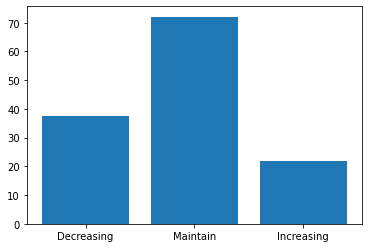

In [13]:
label=['Decreasing','Maintain','Increasing']
values=[count_array[0]/8*100,count_array[1]/355*100,count_array[2]/23*100]

x = np.arange(3)

plt.bar(x, values)
plt.xticks(x, label)

plt.show()

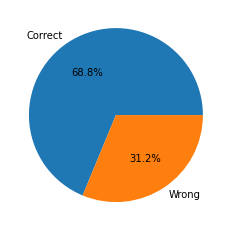

In [14]:
import matplotlib.pyplot as plt

ratio = [count,len(test_y)-count]
labels = ['Correct', 'Wrong']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()